In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

<ipython-input-1-9174b814a709>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [3]:
df=read_csv('data.csv')

In [4]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


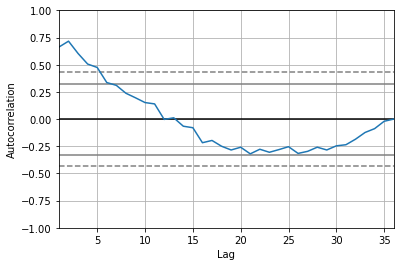

In [5]:
def parser(x):
    return datetime.strptime('190'+x,'%Y-%m')

series=read_csv('data.csv',header=0,parse_dates=[0],index_col=0,squeeze=True,date_parser=parser)
autocorrelation_plot(series)
pyplot.show()

Month
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales, dtype: float64


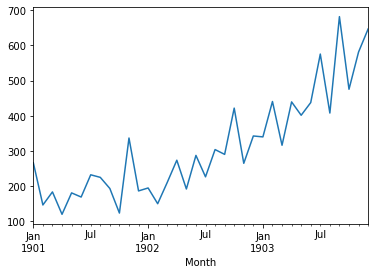

In [7]:
print(series.tail())
series.plot()
pyplot.show()

In [15]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame

In [23]:
series.index=series.index.to_period('M')

AttributeError: 'PeriodIndex' object has no attribute 'to_period'

In [22]:
series.head()

Month
1901-01    266.0
1901-02    145.9
1901-03    183.1
1901-04    119.3
1901-05    180.3
Freq: M, Name: Sales, dtype: float64

In [18]:
model=ARIMA(series,order=(5,1,0))
model_fit=model.fit()

In [19]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Thu, 10 Dec 2020   AIC                            408.969
Time:                        22:24:34   BIC                            418.301
Sample:                    01-31-1901   HQIC                           412.191
                         - 12-31-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

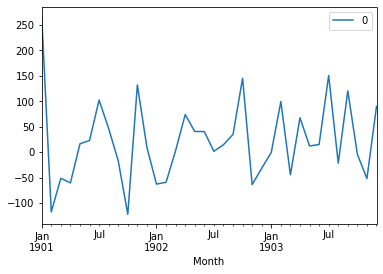

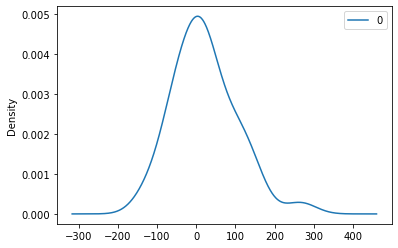

                0
count   36.000000
mean    21.936144
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000


In [26]:
residuals=DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [29]:
X=series.values
size=int(len(X)*0.66)
train,test=X[0:size],X[size:len(X)]

In [31]:
history=[x for x in train]
predictions=list()

In [34]:
for t in range(len(test)):
    model=ARIMA(history,order=(5,1,0))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=output[0]
    predictions.append(yhat)
    obs=test[t]
    history.append(obs)
    print('predicted=%f, expected=%f'%(yhat,obs))

predicted=343.272180, expected=342.300000
predicted=293.329674, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220221, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047836, expected=437.400000
predicted=378.365674, expected=575.500000
predicted=459.415020, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231275, expected=475.300000
predicted=672.914944, expected=581.300000
predicted=531.541449, expected=646.900000


Test RMSE:89.021


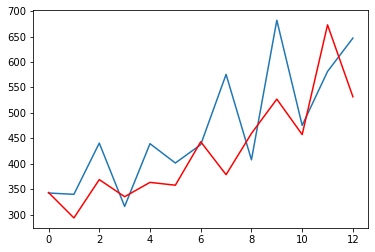

In [35]:
rmse=sqrt(mean_squared_error(test,predictions))
print('Test RMSE:%.3f' %rmse)
pyplot.plot(test)
pyplot.plot(predictions,color='red')
pyplot.show()